In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import math
from ipywidgets import interactive, IntSlider, FloatSlider

In [2]:
def get_sub_plots(title):
    fig = plt.figure(1, figsize=(20, 5))

    sp1 = fig.add_subplot(131)
    sp1.set_title("X - Y")
    sp1.set_xlabel('X - Koordinaten')
    sp1.set_ylabel('Y - Koordinaten')

    sp2 = fig.add_subplot(132)
    sp2.set_title("X - Z")
    sp2.set_xlabel('X - Koordinaten')
    sp2.set_ylabel('Z - Koordinaten')

    sp3 = fig.add_subplot(133)
    sp3.set_title("Z - Y")
    sp3.set_xlabel('Z - Koordinaten')
    sp3.set_ylabel('Y - Koordinaten')

    plt.suptitle(title)
    
    return sp1, sp2, sp3

def show_images(sp1, sp2, sp3):
    img1=mpimg.imread('front.jpg')
    sp1.imshow(img1,origin='lower')

    img2=mpimg.imread('top.jpg')
    sp2.imshow(img2,origin='lower')

    img3=mpimg.imread('side.jpg')
    sp3.imshow(img3,origin='lower')
    
def get_vector_colors(colors, size):
    if colors == None:
        colors = [['r','g']] * size
    return colors

def add_vectors(sp, start_x, end_x, start_y, end_y, colors, start_fmt, line_width):
    lines = sp.plot([start_x, end_x], [start_y, end_y], '-', linewidth=line_width, markersize=0)
    for i in range(len(colors)):
        lines[i].set_color(colors[i][0])
    lines = sp.plot([start_x, start_x], [start_y, start_y], start_fmt, markersize=4)
    for i in range(len(colors)):
        lines[i].set_color(colors[i][1])
        
def add_rect(sp, x, y, w, h, color):
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor=color, facecolor=color)
    sp.add_patch(rect)

def plot(coords, title):
    sp1, sp2, sp3 = get_sub_plots(title)
    
    sp1.scatter(x=coords[0], y=coords[1], c='r', s=1)
    sp2.scatter(x=coords[0], y=coords[2], c='r', s=1)
    sp3.scatter(x=coords[2], y=coords[1], c='r', s=1)
    
    plt.show()
    
def plot_with_image(coords, title):
    sp1, sp2, sp3 = get_sub_plots(title)
    
    sp1.scatter(x=coords[0], y=coords[1], c='r', s=1)
    sp2.scatter(x=coords[0], y=coords[2], c='r', s=1)
    sp3.scatter(x=coords[2], y=coords[1], c='r', s=1)
    
    show_images(sp1, sp2, sp3)
    
    plt.show()
    
def plot_vectors(start, end, title, start_fmt='x', line_width=0.5, colors=None):
    colors = get_vector_colors(colors, len(start[0]))
    
    sp1, sp2, sp3 = get_sub_plots(title)
    
    add_vectors(sp1, start[0], end[0], start[1], end[1], colors, start_fmt, line_width)
    add_vectors(sp2, start[0], end[0], start[2], end[2], colors, start_fmt, line_width)
    add_vectors(sp3, start[2], end[2], start[1], end[1], colors, start_fmt, line_width)
    
    plt.show()
    
def plot_vectors_with_image(start, end, title, start_fmt='x', line_width=0.5, colors=None):
    colors = get_vector_colors(colors, len(start[0]))
    
    sp1, sp2, sp3 = get_sub_plots(title)
    
    add_vectors(sp1, start[0], end[0], start[1], end[1], colors, start_fmt, line_width)
    add_vectors(sp2, start[0], end[0], start[2], end[2], colors, start_fmt, line_width)
    add_vectors(sp3, start[2], end[2], start[1], end[1], colors, start_fmt, line_width)
    
    show_images(sp1, sp2, sp3)
    
    plt.show()
    
def plot_vectors_with_image_and_aois(start, end, aois, title, start_fmt='x', line_width=0.5, colors=None):
    colors = get_vector_colors(colors, len(start[0]))
    
    sp1, sp2, sp3 = get_sub_plots(title)
    
    add_vectors(sp1, start[0], end[0], start[1], end[1], colors, start_fmt, line_width)
    add_vectors(sp2, start[0], end[0], start[2], end[2], colors, start_fmt, line_width)
    add_vectors(sp3, start[2], end[2], start[1], end[1], colors, start_fmt, line_width)
    
    for aoi in aois:
        add_rect(sp1, aoi.x, aoi.y, aoi.w, aoi.h, aoi.color)
        add_rect(sp2, aoi.x, aoi.z, aoi.w, aoi.d, aoi.color)
        add_rect(sp3, aoi.z, aoi.y, aoi.d, aoi.h, aoi.color)
        
    show_images(sp1, sp2, sp3)

    plt.show()
    
def plot_heatmap(aoi, title, save=False, filename='aoi.png'):
    sp1, sp2, sp3 = get_sub_plots(title)
    
    add_rect(sp1, aoi.x, aoi.y, aoi.w, aoi.h, aoi.color)
    add_rect(sp2, aoi.x, aoi.z, aoi.w, aoi.d, aoi.color)
    add_rect(sp3, aoi.z, aoi.y, aoi.d, aoi.h, aoi.color)
    
    if len(aoi.points) > 0:
        points = np.swapaxes(np.array(aoi.points), 0, 1)

        sp1.scatter(x=points[0], y=points[1], c=[[1, 0, 0, 0.2]], s=50, zorder=2)
        sp2.scatter(x=points[0], y=points[2], c=[[1, 0, 0, 0.2]], s=50, zorder=2)
        sp3.scatter(x=points[2], y=points[1], c=[[1, 0, 0, 0.2]], s=50, zorder=2)
        
    show_images(sp1, sp2, sp3)
    if save:
        plt.savefig(filename)
    plt.show()

In [3]:
df = pd.read_csv('./2_raw/2019-02-27/webcam_2019-02-27-14-57.csv', sep=', ', engine='python')

face_df = df[(df[['eye_lmk_X_0','eye_lmk_Y_0','eye_lmk_Z_0']] != 0).all(axis=1)]
gaze_df = df[(df[['success']] == 1).all(axis=1)]
gaze_df = gaze_df[(gaze_df[['gaze_0_x','gaze_0_y','gaze_0_z']] != 0).all(axis=1)]

COORDS_FACE = np.array([face_df['eye_lmk_X_0'], face_df['eye_lmk_Y_0'], face_df['eye_lmk_Z_0']])
COORDS_GAZE = np.array([gaze_df['eye_lmk_X_0'], gaze_df['eye_lmk_Y_0'], gaze_df['eye_lmk_Z_0']])

GAZES = np.array([gaze_df['gaze_0_x'], gaze_df['gaze_0_y'], gaze_df['gaze_0_z']])

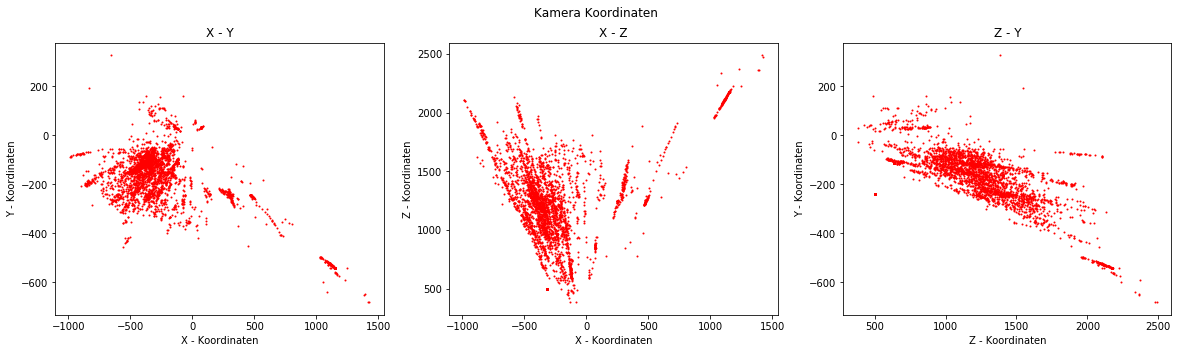

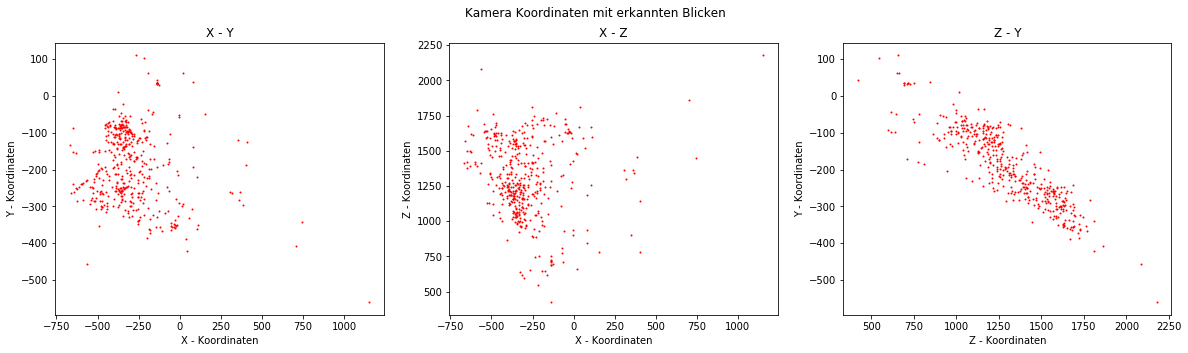

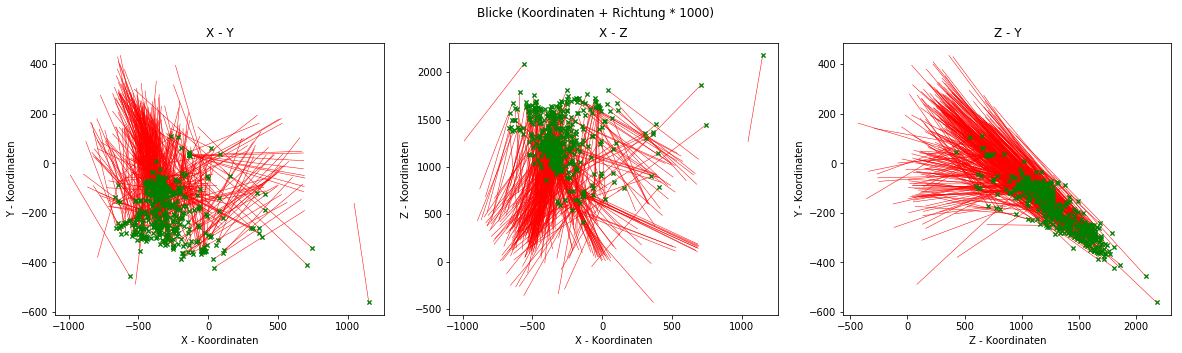

In [4]:
### Erster Plot ###
plot(COORDS_FACE, 'Kamera Koordinaten')

### Zweiter Plot ###
plot(COORDS_GAZE, 'Kamera Koordinaten mit erkannten Blicken')

### Dritter Plot ###
# Achsen umdrehen für Berechnung: soll -> [[x1,y1,z1],[x2,y2,z2],...] ist -> [[x1,x2,...],[y1,y2,...],[z1,z2,...]]
gaze_ends = np.swapaxes(np.swapaxes(COORDS_GAZE, 0, 1) + np.swapaxes(GAZES, 0, 1) * 1000, 0, 1)
plot_vectors(COORDS_GAZE, gaze_ends, 'Blicke (Koordinaten + Richtung * 1000)')

In [5]:
# siehe https://de.wikipedia.org/wiki/Abbildungsmatrix
#       https://de.wikipedia.org/wiki/Koordinatentransformation
#       https://de.wikipedia.org/wiki/Homogene_Koordinaten
#       https://de.wikipedia.org/wiki/Drehmatrix

def translate(x, y, z):
    return np.array([
        [1, 0, 0, x],
        [0, 1, 0, y],
        [0, 0, 1, z],
        [0, 0, 0, 1]
    ])

def rotate_x(phi):
    return np.array([
        [1, 0,        0,         0],
        [0, math.cos(phi), -math.sin(phi), 0],
        [0, math.sin(phi), math.cos(phi),  0],
        [0, 0,        0,         1]
    ])

def rotate_y(phi):
    return np.array([
        [math.cos(phi),  0, math.sin(phi), 0],
        [0,         1, 0,        0],
        [-math.sin(phi), 0, math.cos(phi), 0],
        [0,         0, 0,        1]
    ])

def rotate_z(phi):
    return np.array([
        [math.cos(phi), -math.sin(phi), 0, 0],
        [math.sin(phi), math.cos(phi),  0, 0],
        [0,        0,         1, 0],
        [0,        0,         0, 1]
    ])

def scale_x(factor):
    return np.array([
        [factor, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

def scale_y(factor):
    return np.array([
        [1, 0, 0, 0],
        [0, factor, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

def scale_z(factor):
    return np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, factor, 0],
        [0, 0, 0, 1]
    ])

In [6]:
# Achsen umdrehen: soll -> [[x1,y1,z1],[x2,y2,z2],...] ist -> [[x1,x2,...],[y1,y2,...],[z1,z2,...]]
TEST_COORDS = np.swapaxes(COORDS_FACE, 0, 1) 

# 1 als 4te Dimension (für die Transformation)
TEST_COORDS = np.insert(TEST_COORDS, 3, 1, axis=1) 

In [7]:
ORIGIN = np.array([[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1]], dtype=float)
AXES = np.array([[1000, 0, 0, 1], [0, 1000, 0, 1], [0, 0, 1000, 1]], dtype=float)
AXES_COLORS = [['r', 'k'], ['g', 'k'], ['b', 'k']]

In [8]:
def draw(rx,ry,rz,sx,sy,sz,dx,dy,dz):
    rot_x = rotate_x(math.radians(rx))
    rot_y = rotate_y(math.radians(ry))
    rot_z = rotate_z(math.radians(rz))
    
    s_x = scale_x(sx)
    s_y = scale_y(sy)
    s_z = scale_z(sz)
    
    d = translate(dx, dy, dz)
    
    tr = scale_x(-1) @ rotate_y(math.radians(-90)) @ d @ s_z @ s_y @ s_x @ rot_z @ rot_y @ rot_x @ scale_y(-1)
    
    plot_vectors_with_image(np.swapaxes(ORIGIN @ tr.T, 0, 1), np.swapaxes(AXES @ tr.T, 0, 1), 'Kameratest', colors=AXES_COLORS, line_width=3)
    plot_with_image(np.swapaxes(TEST_COORDS @ tr.T, 0, 1), 'Transformierte Koordinaten')

interactive_plot = interactive(
    draw,
    rx=IntSlider(min=-180, max=180, step=1, value=10),
    ry=IntSlider(min=-180, max=180, step=1, value=30),
    rz=IntSlider(min=-180, max=180, step=1, value=-5),
    sx=FloatSlider(min=-0.01, max=1, step=0.01, value=0.4),
    sy=FloatSlider(min=-0.01, max=1, step=0.01, value=0.4),
    sz=FloatSlider(min=-0.01, max=1, step=0.01, value=0.4),
    dx=IntSlider(min=-1000, max=1000, step=1, value=125),
    dy=IntSlider(min=-1000, max=1000, step=1, value=400),
    dz=IntSlider(min=-1000, max=1000, step=1, value=25)
)

output = interactive_plot.children[-1]
output.layout.height = '640px'
interactive_plot

interactive(children=(IntSlider(value=10, description='rx', max=180, min=-180), IntSlider(value=30, descriptio…

In [9]:
def get_transformation_matrix():
    rot_x = rotate_x(math.radians(10))
    rot_y = rotate_y(math.radians(30))
    rot_z = rotate_z(math.radians(-5))

    s_x = scale_x(0.5)
    s_y = scale_y(0.5)
    s_z = scale_z(0.5)

    d = translate(125, 400, 25)
    
    return scale_x(-1) @ rotate_y(math.radians(-90)) @ d @ s_z @ s_y @ s_x @ rot_z @ rot_y @ rot_x @ scale_y(-1)

TRANSFORMATION_MATRIX = get_transformation_matrix()

In [10]:
# Normalisieren eines Vektors
def normalize(x):
    return x / np.linalg.norm(x)

def apply_transfromation(x, swap=True):
    x = np.swapaxes(x, 0, 1)

    # Dimension erweitern für Transformation
    x = np.insert(x, 3, 1, axis=1)
    x = x @ TRANSFORMATION_MATRIX.T
    
    x = np.delete(x, 3, axis=1)
    if swap:
        return np.swapaxes(x, 0, 1)
    else:
        return x

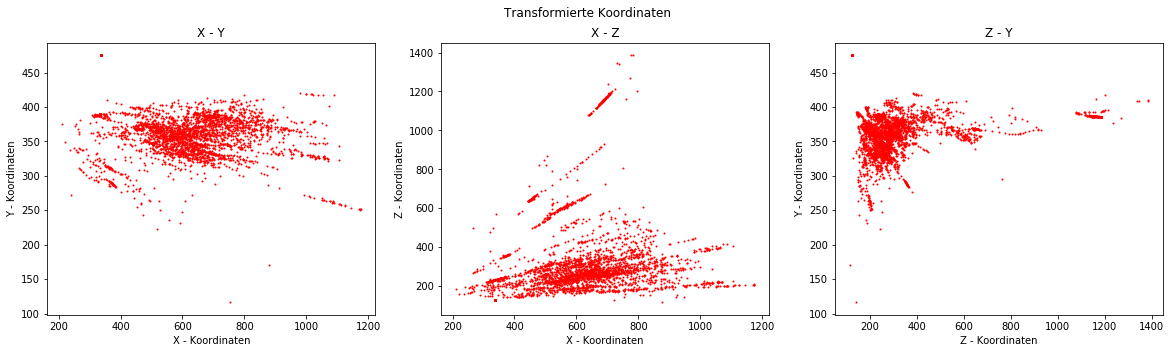

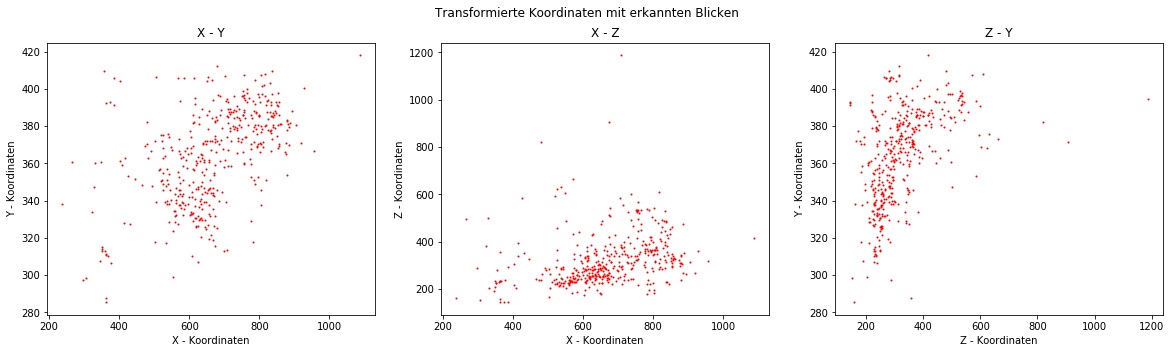

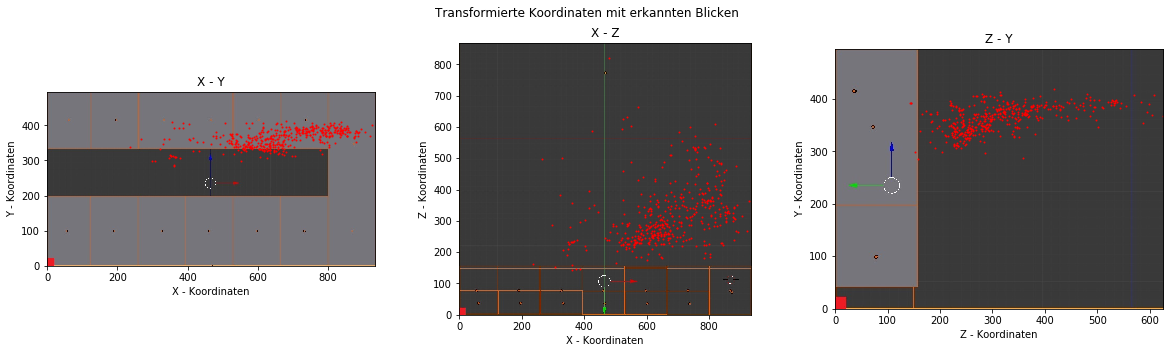

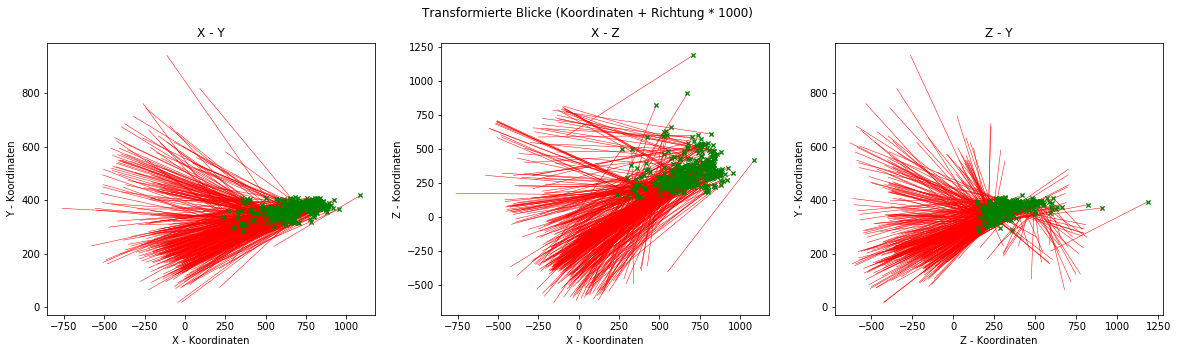

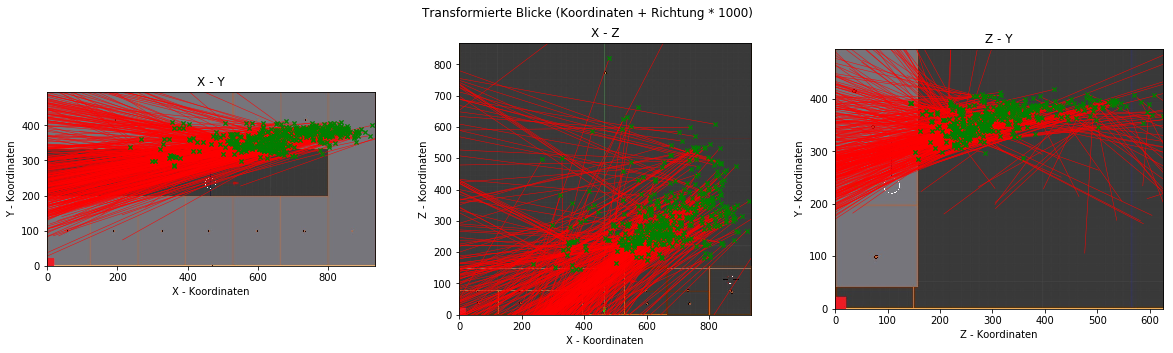

In [11]:
### Erster Plot ###
plot(apply_transfromation(COORDS_FACE), 'Transformierte Koordinaten')

### Zweiter Plot ###
plot(apply_transfromation(COORDS_GAZE), 'Transformierte Koordinaten mit erkannten Blicken')
plot_with_image(apply_transfromation(COORDS_GAZE), 'Transformierte Koordinaten mit erkannten Blicken')

### Dritter Plot ###
gaze_ends = np.swapaxes(np.swapaxes(COORDS_GAZE, 0, 1) + np.swapaxes(GAZES, 0, 1), 0, 1)

coords = apply_transfromation(COORDS_GAZE, swap=False)
gaze_ends = apply_transfromation(gaze_ends, swap=False)

directions = gaze_ends - coords
directions = np.array([normalize(directions[i]) for i in range(len(directions))])

gaze_ends = coords + directions * 1000

coords = np.swapaxes(coords, 0, 1)
gaze_ends = np.swapaxes(gaze_ends, 0, 1)

plot_vectors(coords, gaze_ends, 'Transformierte Blicke (Koordinaten + Richtung * 1000)')
plot_vectors_with_image(coords, gaze_ends, 'Transformierte Blicke (Koordinaten + Richtung * 1000)')

In [12]:
class AOI(object):
    '''
    P1-----------P2
    |             |
    |             |
    P3-----------P4
    
    v1: P1--->P2
    v2: P1--->P3
    
    x: min x 
    y: min y 
    z: min z 
    
    w: x dim
    h: y dim
    d: z dim
    
    points: gaze hits
    '''
    def __init__(self, p1, p2, p3, color, title):
        self.title = title
        self.color = color
        self.p1 = np.array(p1, dtype=float)
        self.p2 = np.array(p2, dtype=float)
        self.p3 = np.array(p3, dtype=float)
        self.v1 = np.array(self.p2 - self.p1, dtype=float)
        self.v2 = np.array(self.p3 - self.p1, dtype=float)
        self.p4 = np.array(self.p1 + self.v1 + self.v2, dtype=float)
        self.n = np.array(np.cross(self.v1, self.v2), dtype=float)
        self.x = min(self.p1[0], self.p2[0], self.p3[0], self.p4[0])
        self.y = min(self.p1[1], self.p2[1], self.p3[1], self.p4[1])
        self.z = min(self.p1[2], self.p2[2], self.p3[2], self.p4[2])
        self.w = max(self.p1[0], self.p2[0], self.p3[0], self.p4[0]) - self.x
        self.h = max(self.p1[1], self.p2[1], self.p3[1], self.p4[1]) - self.y
        self.d = max(self.p1[2], self.p2[2], self.p3[2], self.p4[2]) - self.z
        self.points = []
        

def get_aois():
    schrank_oben = AOI([0, 330, 75], [800, 330, 75], [0, 496, 75], 'orange', 'Schrank oben')
    wand = AOI([0, 330, 1], [0, 200, 1], [800, 330, 1], 'blue', 'Wand zwischen Schränken')
    schrank_unten = AOI([0, 200, 156], [800, 200, 156], [0, 0, 156], 'white', 'Schrank unten')
    af = AOI([0, 200, 0], [800, 200, 0], [0, 200, 156], 'green', 'Arbeitsfläche')
    ks = AOI([800, 0, 156], [935, 0, 156], [800, 496, 156], 'cyan', 'Kühlschrank')
    
    return [schrank_oben, wand, schrank_unten, ks, af]

class Intersection(object):
    def __init__(self, start, direction, aoi):
        self.start = start
        self.direction = normalize(direction)
        self.aoi = aoi
        self.distance = intersect_plane(self.start, direction, self.aoi.p1, normalize(self.aoi.n))
        self.end = self.start + self.distance * self.direction
        self.hit_x = False
        self.hit_y = False
        self.hit_z = False
        self.is_hit = False
        self.hit()
        
    def hit(self):
        if self.end[0] >= self.aoi.x - 1 and self.end[0] <= self.aoi.x + self.aoi.w + 1:
            self.hit_x = True
        if self.end[1] >= self.aoi.y - 1 and self.end[1] <= self.aoi.y + self.aoi.h + 1:
            self.hit_y = True
        if self.end[2] >= self.aoi.z - 1 and self.end[2] <= self.aoi.z + self.aoi.d + 1:
            self.hit_z = True
        if self.hit_z and self.hit_y and self.hit_x:
            self.is_hit = True
        else:
            self.distance = np.inf
            self.is_hit = False
            
    def get_target(self):
        return self.start + self.direction * self.distance

# siehe: https://gist.github.com/rossant/6046463
def intersect_plane(O, D, P, N):
    # Return the distance from O to the intersection of the ray (O, D) with the 
    # plane (P, N), or +inf if there is no intersection.
    # O and P are 3D points, D and N (normal) are normalized vectors.
    denom = np.dot(D, N)
    if np.abs(denom) < 1e-6:
        return np.inf
    d = np.dot(P - O, N) / denom
    if d < 0:
        return np.inf
    return d

def aoi_to_point_and_normal(aoi):
    return aoi.p1, normalize(aoi.n)

def aois_to_point_and_normal(aois):
    return np.array([aoi_to_point_and_normal(aoi) for aoi in aois])

def intersect_aoi(start, direction, aoi):
    return intersect_plane(start, normalize(direction), aoi.p1, normalize(aoi.n))

def intersect_aois(start, direction, aois):
    return np.array([intersect_plane(start, normalize(direction), aoi.p1, normalize(aoi.n)) for aoi in aois])

def get_distances_to_aois(start_points, direction_vectors, aois):
    return np.array([intersect_aois(start_points[i], direction_vectors[i], aois) for i in range(len(start_points))])

def get_intersection_point(start, direction, distance):
    if distance < np.inf:
        return np.array(start + normalize(direction) * distance)
    else:
        return start
    
def get_single_aoi_intersection(start, direction, aoi):
    return Intersection(start, direction, aoi)

def get_single_aois_intersection(start, direction, aois):
    return np.array([Intersection(start, direction, aoi) for aoi in aois])

def get_all_aois_intersection(start_points, directions, aois):
    return np.array([get_single_aois_intersection(start_points[i], directions[i], aois) for i in range(len(start_points))])
        
def set_closest_intersection_and_get_distance(intersections):
    closest = min(intersections, key=lambda x: x.distance)
    if closest.distance < np.inf:
        closest.aoi.points.append(closest.get_target())
    return closest.distance

def get_gaze_pairs(coords, directions, distances):
    start_list = []
    end_list = []
    for i in range(len(coords)):
        if distances[i] < np.inf:
            start_list.append(coords[i])
            end_list.append(coords[i] + normalize(directions[i]) * distances[i])
    return np.array(start_list), np.array(end_list)

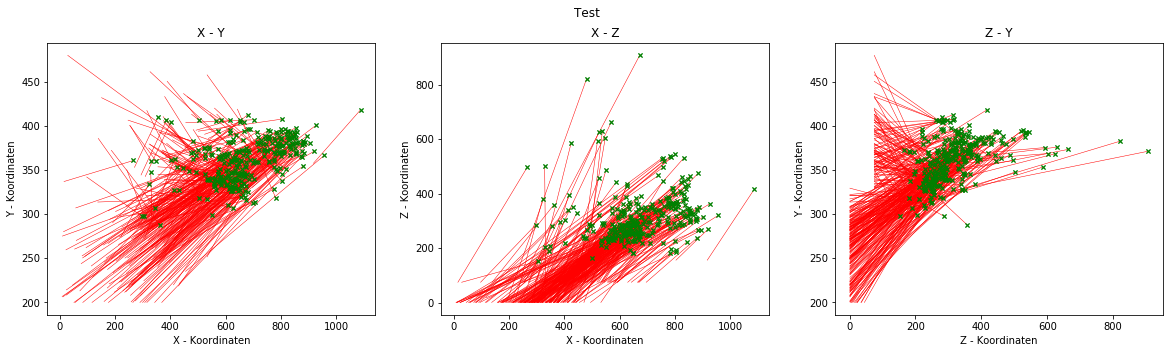

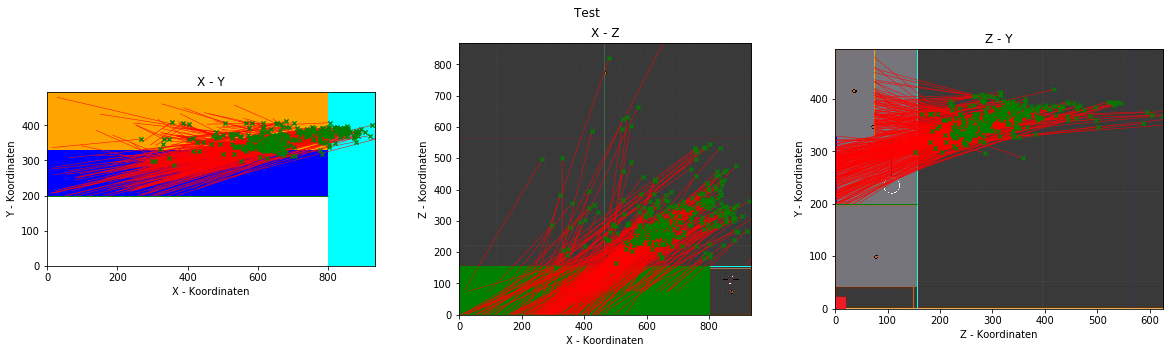

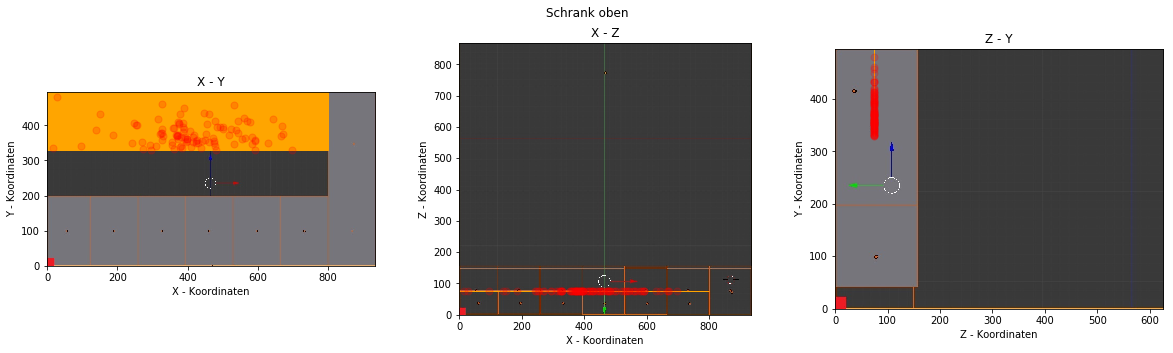

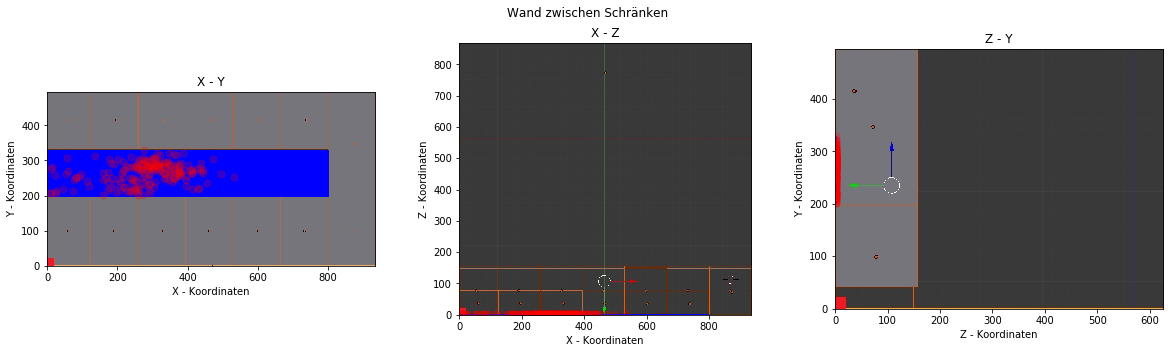

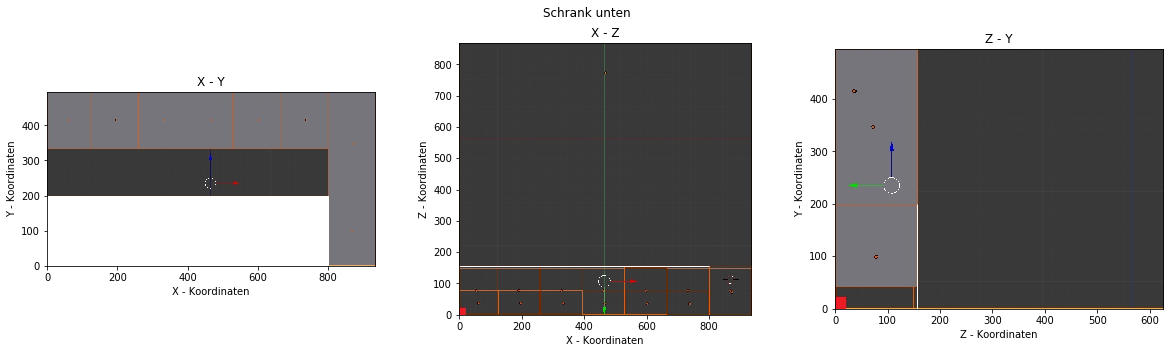

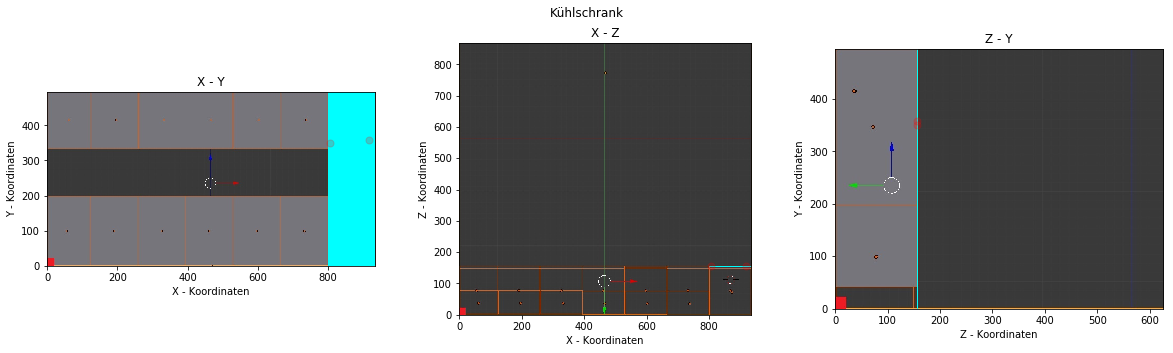

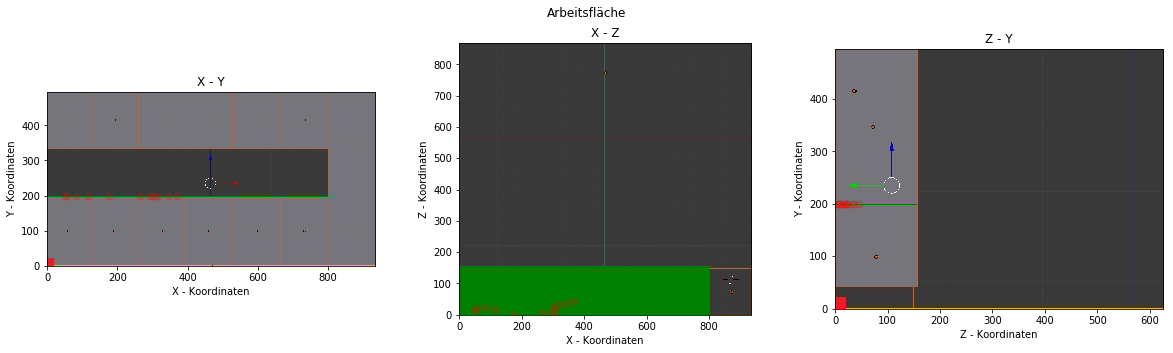

In [13]:
coords = COORDS_GAZE
directions = GAZES

# normierte Blickrichtung auf Startkoordinaten addieren
gaze_ends = np.swapaxes(np.swapaxes(coords, 0, 1) + np.swapaxes(directions, 0, 1), 0, 1)

# transformieren
TRANSFORMED_COORDS_GAZE = apply_transfromation(COORDS_GAZE, swap=False)
gaze_ends = apply_transfromation(gaze_ends, swap=False)

# Blickrichtung zurückrechnen und normalisieren
directions = gaze_ends - TRANSFORMED_COORDS_GAZE
TRANSFORMED_GAZES = np.array([normalize(directions[i]) for i in range(len(directions))])

aois = get_aois()

# Intersektion Ojekte erstellen
intersections = get_all_aois_intersection(TRANSFORMED_COORDS_GAZE, TRANSFORMED_GAZES, aois)

# Kürzeste Entfernung für jeden Punkt
distances = np.array([set_closest_intersection_and_get_distance(intersections[i]) for i in range(len(intersections))])

# Start- und Endpunkte der Blicke (Start = Ende, wenn kein Schnittpunkt => Entfernung INF)
coords, gaze_end = get_gaze_pairs(TRANSFORMED_COORDS_GAZE, TRANSFORMED_GAZES, distances)

coords = np.swapaxes(coords, 0, 1)
gaze_end = np.swapaxes(gaze_end, 0, 1)

plot_vectors(coords, gaze_end, 'Test')
plot_vectors_with_image_and_aois(coords, gaze_end, aois, 'Test')

for aoi in aois:
    plot_heatmap(aoi, aoi.title, save=True, filename='%s.png' % aoi.title)